In [145]:
# imports and load data
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv('store_data.csv')
df['week'] = pd.to_datetime(df.week)
df = df.set_index('week')

In [146]:
# explore data
df

,storeA,storeB,storeC,storeD,storeE
week,,,,,
2014-05-04,2643,8257,3893,6231,1294
2014-05-11,6444,5736,5634,7092,2907
2014-05-18,9646,2552,4253,5447,4736
2014-05-25,5960,10740,8264,6063,949
2014-06-01,7412,7374,3208,3985,3023
2014-06-08,1289,10137,5070,7163,1703
2014-06-15,6282,3925,5528,4748,3351
2014-06-22,5135,7317,5530,4595,104
2014-06-29,11766,12560,3199,4676,3573


storeA    25127
storeB    24595
storeC    16447
storeD    22783
storeE     7787
Name: 2018-02-28 00:00:00, dtype: int64


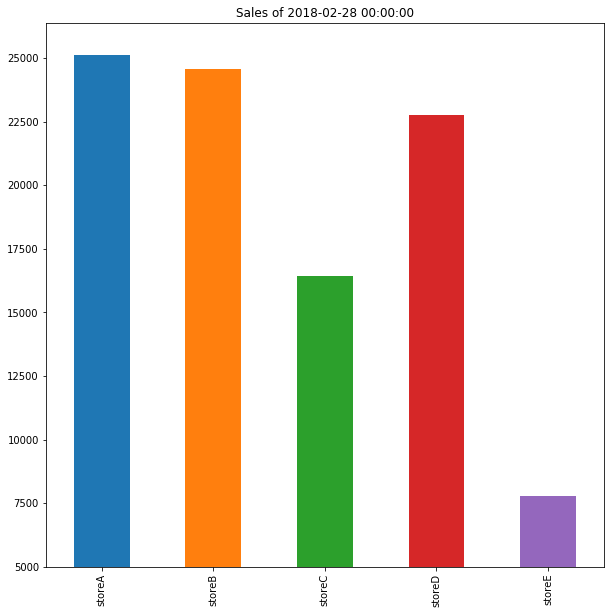

In [148]:

# sales for the last month
dfm = df.resample('M').sum()

df_lastmonth = dfm.iloc[-1]
print(df_lastmonth)

df_lastmonth.plot(
    kind='bar'
    ,title='Sales of {0}'.format(df_lastmonth.name)
    ,figsize=(10,10) 
    ,ylim =5000
    
);

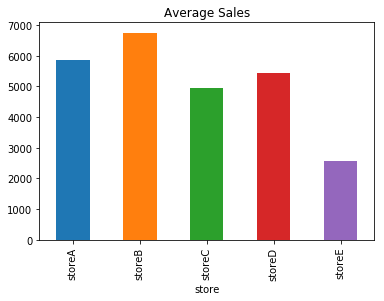

In [211]:

# average sales
df_desc = df.describe()
df_mean = df_desc[df_desc.index == 'mean']
df_mean_pivot = pd.melt(df_mean)

df_mean_pivot.rename(columns={'variable':'store', 'value': 'avg_sales'}, inplace=True)
df_mean_pivot = df_mean_pivot.set_index('store')

df_mean_pivot.avg_sales.plot.bar(title='Average Sales');

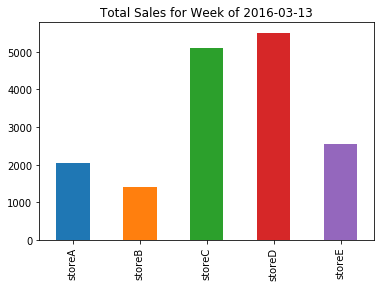

In [240]:
# sales for the week of March 13th, 2016
target_week_df = df.loc[pd.Timestamp(2016,3,13)]
target_week_df.plot.bar(title='Total Sales for Week of {0}'.format(pd.Timestamp(2016,3,13).strftime("%Y-%m-%d")));

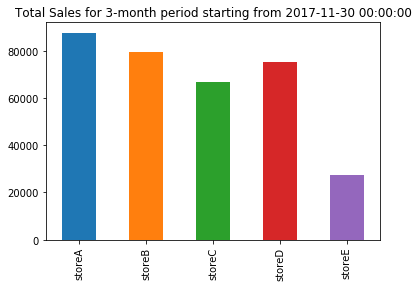

In [241]:
# sales for the latest 3-month periods
df_3m = df.resample('3M', label='left').sum()
df_3m.iloc[-1].plot.bar(title='Total Sales for 3-month period starting from {0}'.format(df_3m.iloc[-1].name));